In [41]:
#author: Alihan Ucar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns

In [42]:
df_tefas = pd.read_csv("tefasveriler.csv", sep=";")

In [43]:
df_tefas.head()

,Tarih,Fon Kodu,Fon Adı,Fiyat,Tedavüldeki Pay Sayısı,Kişi Sayısı,Fon Toplam Değer
0,11.12.2017,AAK,ATA PORTFÖY ÇOKLU VARLIK DEĞİŞKEN FON,23.601488,967072,276,22824338.22
1,11.12.2017,AAL,ATA PORTFÖY PARA PİYASASI (TL) FONU,0.406143,174892759,2826,71031401.46
2,11.12.2017,AAS,ATA PORTFÖY FON SEPETİ SERBEST FONU,0.016381,2468732414,0,40439625.6
3,11.12.2017,AAV,ATA PORTFÖY İKİNCİ HİSSE SENEDİ (TL) FONU (HİS...,0.022427,1307938819,9,29332584.37
4,11.12.2017,ABU,AK PORTFÖY BİREBİR BANKACILIK DEĞİŞKEN ÖZEL FON,0.013757,995330922,0,13692586.5


In [44]:
df_tefas = df_tefas.set_index('Fon Kodu')

In [45]:
df_tefas.head()

,Tarih,Fon Adı,Fiyat,Tedavüldeki Pay Sayısı,Kişi Sayısı,Fon Toplam Değer
Fon Kodu,,,,,,
AAK,11.12.2017,ATA PORTFÖY ÇOKLU VARLIK DEĞİŞKEN FON,23.601488,967072,276,22824338.22
AAL,11.12.2017,ATA PORTFÖY PARA PİYASASI (TL) FONU,0.406143,174892759,2826,71031401.46
AAS,11.12.2017,ATA PORTFÖY FON SEPETİ SERBEST FONU,0.016381,2468732414,0,40439625.6
AAV,11.12.2017,ATA PORTFÖY İKİNCİ HİSSE SENEDİ (TL) FONU (HİS...,0.022427,1307938819,9,29332584.37
ABU,11.12.2017,AK PORTFÖY BİREBİR BANKACILIK DEĞİŞKEN ÖZEL FON,0.013757,995330922,0,13692586.5


Lütfen fon kodunu giriniz:NNF
Toplam gerçekleşen nakit giriş veya çıkış tutarı: 582,786,703


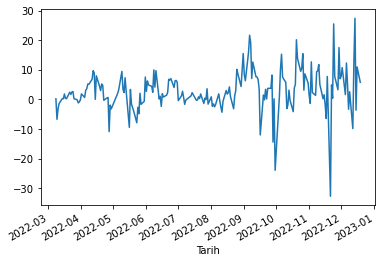

In [46]:
#We get variables from user:

fonkodu=input("Lütfen fon kodunu giriniz:")
#start_date=input("Lütfen başlangıç tarihini giriniz. GG.AA.YYYY:")
#end_date=input("Lütfen bitiş tarihini giriniz. GG.AA.YYYY:")

#Sample dates:
start_date = '08.03.2022'
end_date = '06.01.2023'

# Convert the start and end dates to datetime objects
start_date = pd.to_datetime(start_date, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date, format='%d.%m.%Y')

def cashflow_fund(fonkodu):
    #read fund datas from csv.
    df_tefas = pd.read_csv("tefasveriler.csv", sep=";")
    
    #We set 'Fon Kodu' column as a index.
    df_tefas = df_tefas.set_index('Fon Kodu')
    
    #We prepare new dataframe for fund which we got from user as a input at the beginning.
    fonverileri = df_tefas.loc[[fonkodu],['Tarih','Fiyat','Tedavüldeki Pay Sayısı']]
    
    #We transform the datas according to their type
    fonverileri['Fiyat'] = pd.to_numeric(fonverileri['Fiyat'])
    fonverileri['Tedavüldeki Pay Sayısı'] = pd.to_numeric(fonverileri['Tedavüldeki Pay Sayısı'])
    fonverileri['Tarih'] = pd.to_datetime(fonverileri['Tarih'], format='%d.%m.%Y')
    
    #Firstly, we create list with 0 for cash flow column that we calculates in next lines. We created list with 0 because
    #cash flow data starts in second row, first row must contain data.
    results = [0]
    
    # Iterate over the rows of the dataframe
    for i in range(1, len(fonverileri)):
        
        # Calculate the difference in the "Tedavüldeki Pay Sayısı" column
        diff = fonverileri.iloc[i]['Tedavüldeki Pay Sayısı'] - fonverileri.iloc[i-1]['Tedavüldeki Pay Sayısı']
        
        # Multiply the difference by the current row's "Fiyat"
        result = diff * fonverileri.iloc[i]['Fiyat']
        
        # Append the result to the list
        results.append(result)
        
        # Add the results as a new column to the dataframe
    fonverileri['Nakit Giriş Çıkış'] = results

    
    # Select the rows within the specified date range
    fonverileri = fonverileri[(fonverileri['Tarih'] >= start_date) & (fonverileri['Tarih'] <= end_date)]
    
    #Calculate cash flow column summation.
    toplam_cashflow= fonverileri['Nakit Giriş Çıkış'].sum()
    
    #Convert it to the integer.
    toplam_cashflow = int(toplam_cashflow)
    
    #print with thousand seperators
    print(f"Toplam gerçekleşen nakit giriş veya çıkış tutarı: {toplam_cashflow:,}")
    
    fonverileri.set_index('Tarih', inplace=True)
    fonverileri['Nakit Giriş Çıkış'] /= 1000000
    fonverileri['Nakit Giriş Çıkış'].plot()
    
    
cashflow_fund(fonkodu)